In [1]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
# Import the training set
dataset_train = pd.read_excel('C(MLCC).xlsx')  # 讀取訓練集
dataset_test = pd.read_excel('C(MLCC)_測試.xlsx')
data_all = pd.concat((dataset_train,dataset_test),join='inner', axis = 0)
data_all=data_all.fillna(method="ffill")
#dataset_train=dataset_train.dropna(axis=1)
training_set = data_all.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]#.values  # 取欄位值
training_set1= data_all.iloc[:, 1:2].values

In [3]:
training_set

,- MARKET VALUE,- PRICE INDEX,- ASK PRICE,- BID PRICE,- PRICE HIGH,- PRICE LOW,- OPENING PRICE,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW
0,27216.30,248.8,42.33,42.16,27.58,27.03,27.25,12.40,12.40,12.45,12.40,12.55,12.30
1,27545.52,251.8,42.84,42.67,28.13,27.47,27.58,12.55,12.55,12.60,12.55,12.80,12.50
2,27545.52,251.8,42.84,42.67,28.13,27.47,27.58,12.55,12.55,12.60,12.55,12.80,12.50
3,27435.78,250.8,42.50,42.33,28.13,27.36,28.13,12.80,12.50,12.50,12.45,12.80,12.45
4,27216.30,248.8,42.33,42.16,27.69,27.03,27.58,12.55,12.40,12.45,12.40,12.60,12.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,175086.10,2419.5,410.50,410.00,354.04,337.92,342.88,415.00,410.00,410.50,410.00,428.50,409.00
481,178929.40,2472.6,419.00,418.50,352.80,339.16,340.40,412.00,419.00,419.00,418.50,427.00,410.50
482,178502.40,2466.7,418.50,418.00,370.56,344.95,367.67,445.00,418.00,418.50,418.00,448.50,417.50
483,179997.10,2487.3,422.00,421.50,354.45,346.19,351.14,425.00,421.50,422.00,421.50,429.00,419.00


In [4]:
real_stock_price =data_all.iloc[2100:2232,1].values

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [6]:
X_train = []   
y_train = []   
for i in range(7, 2100):  # 2100 是訓練集總數
    X_train.append(training_set_scaled[i-7:i,:])
    y_train.append(training_set_scaled1[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1))
# Import the Keras libraries and packages

# Initialising the RNN
regressor = Sequential()

In [7]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2093/2093 [==============================] - 11s 5ms/step - loss: 7.8878e-04
Epoch 2/100
2093/2093 [==============================] - 10s 5ms/step - loss: 1.6282e-04
Epoch 3/100
2093/2093 [==============================] - 10s 5ms/step - loss: 1.4751e-04
Epoch 4/100
2093/2093 [==============================] - 9s 4ms/step - loss: 1.4333e-04
Epoch 5/100
2093/2093 [==============================] - 9s 4ms/step - loss: 1.3408e-04
Epoch 6/100
2093/2093 [==============================] - 9s 4ms/step - loss: 2.2800e-04
Epoch 7/100
2093/2093 [==============================] - 9s 4ms/step - loss: 9.0096e-05
Epoch 8/100
2093/2093 [==============================] - 9s 4ms/step - loss: 1.0235e-04
Epoch 9/100
2093/2093 [==============================] - 9s 4ms/step - loss: 1.2286e-04
Epoch 10/100
2093/2093 [==============================] - 9s 4ms/step - loss: 1.2395e-04
Epoch 11/100
2093/2093 [==============================] - 9s 4ms/step - loss: 1.1090e-04
Epoch 12/100
2093/2093 [===

2093/2093 [==============================] - 9s 4ms/step - loss: 1.1351e-04
Epoch 94/100
2093/2093 [==============================] - 9s 4ms/step - loss: 7.1463e-05
Epoch 95/100
2093/2093 [==============================] - 9s 4ms/step - loss: 7.4402e-05
Epoch 96/100
2093/2093 [==============================] - 9s 4ms/step - loss: 7.4733e-05
Epoch 97/100
2093/2093 [==============================] - 9s 4ms/step - loss: 7.1493e-05
Epoch 98/100
2093/2093 [==============================] - 9s 4ms/step - loss: 7.7282e-05
Epoch 99/100
2093/2093 [==============================] - 9s 4ms/step - loss: 7.4999e-05
Epoch 100/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.5940e-05


In [13]:
X_test=[]
for i in range(2101, 2232):  # 1747 是訓練集總數
    X_test.append(training_set_scaled[i-7:i,0:])

In [14]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1))

In [15]:
predicted_stock_price = regressor.predict(X_test)

In [16]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)  # to get the original scale

Text(0, 0.5, 'D Price')

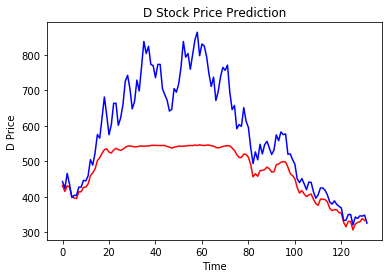

In [17]:
plt.plot(predicted_stock_price,color='red',label= 'predicted_stock_price')
plt.plot(real_stock_price,color = 'blue',label='real_stock_price')
plt.title('C Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('C Price')

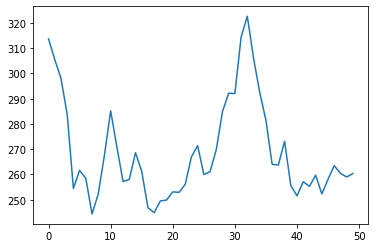

In [44]:
data_50 = pd.read_excel('C(MLCC)_50天_ques.xlsx')
data_50 = data_50.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]
data_50plus = pd.concat((dataset_test,data_50),join='inner', axis = 0)
data_50plus=data_50plus.fillna(method="ffill")
final_scaled=sc.transform(data_50plus)
X_final = []
for i in range(485, 535):  # 1747 是訓練集總數
    X_final.append(final_scaled[i-7:i,0:])
X_final = np.array(X_final)
X_final = np.reshape(X_final, (X_final.shape[0], X_final.shape[1]*X_final.shape[2], 1))
predicted_stock_price = regressor.predict(X_final)
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)
plt.plot(predicted_stock_price)

In [46]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)

predicted_stock_price.to_excel('t15.xlsx')
